In [1]:
using LinearAlgebra
using Plots

In [2]:
include("../../src/helmholtz_sparse.jl")
include("../../src/toolbox.jl")

zeros_like (generic function with 1 method)

In [3]:
function test_helmholtz(exact_u::Function, f::Function, domain::RectangularDomain, alpha::Real, M_list::Vector{Int}, P_list::Vector{Int})
    for i in 1:length(M_list)
        M = M_list[i]
        P = P_list[i]

        dx = (domain.x2 - domain.x1) / M

        xs = range(domain.x1+dx, domain.x2-dx, length=M-1)
        ys = range(domain.y1+dx, domain.y2-dx, length=P-1)

        A, b, u = sp_solve_modified_helmholtz(alpha, M, P, f, dx, domain)
        u_re = reshape(u, M-1, P-1)

        u_true_vec = vec(inflate(exact_u, xs, ys))
        u_true_grid = reshape(u_true_vec, M-1, P-1)
        error = dx*norm(u - u_true_vec)

        println("M = $M, Norm = $error")
    end
end

test_helmholtz (generic function with 1 method)

In [4]:
# Test case 1: example from NPDEs.
function test_u_1(x, y)
    return ((x + 1)^2) * (x - 1) * (y + 1) * (y - 1) + 2sin(2*pi*x) * sin(pi*y)
end

function test_f_1(x, y)
    term_1 = 2 * ((x + 1)^2) * (x - 1)
    term_2 = (6 * x + 2) * (y + 1) * (y - 1)
    term_3 = 3 * ((x + 1)^2) * (x - 1) * (y + 1) * (y - 1)
    term_4 = (6 - 10 * (pi^2)) * sin(2pi * x) * sin(pi * y)
    return sum([term_1, term_2, term_3, term_4])
end

domain = RectangularDomain(-1, 1, -1, 1)
alpha = 3.0
M_list = [16, 32, 64, 128, 256]
P_list = [16, 32, 64, 128, 256] 

test_helmholtz(test_u_1, test_f_1, domain, alpha, M_list, P_list)

M = 16, Norm = 0.09559533480668997
M = 32, Norm = 0.023417913053521405
M = 64, Norm = 0.005824995418019109
M = 128, Norm = 0.0014544150038822085
M = 256, Norm = 0.00036348927259943764


In [5]:
# Test case 2.
function test_u_2(x, y)
    return sin((pi/10) * x) * sin((pi/10) * y)
end

function test_f_2(x, y)
    return -(pi^2 / 50) * sin((pi/10) * x) * sin((pi/10) * y)
end

domain = RectangularDomain(0, 10, 0, 10)
alpha = 0.0
M_list = [16, 32, 64, 128, 256]
P_list = [16, 32, 64, 128, 256] 

test_helmholtz(test_u_2, test_f_2, domain, alpha, M_list, P_list)

M = 16, Norm = 0.01609482220038922
M = 32, Norm = 0.004017888396847841
M = 64, Norm = 0.001004109048500327
M = 128, Norm = 0.00025100457959383683
M = 256, Norm = 6.274972739833604e-5


In [15]:
domain = RectangularDomain(0, 10, 0, 30)
alpha = 0.0
M_list = [16, 32, 64, 128, 256]
P_list = 3*[16, 32, 64, 128, 256]

test_helmholtz(test_u_2, test_f_2, domain, alpha, M_list, P_list)

M = 16, Norm = 0.02787704978986923
M = 32, Norm = 0.006959186842496857
M = 64, Norm = 0.0017391678883814433
M = 128, Norm = 0.0004347526847995673
M = 256, Norm = 0.00010868571607939868


In [7]:
function plot_case(M::Int, P::Int, alpha::Real, f::Function, domain, exact_u::Function)
    dx = (domain.x2 - domain.x1) / M

    xs = range(domain.x1+dx, domain.x2-dx, length=M-1)
    ys = range(domain.y1+dx, domain.y2-dx, length=P-1)

    A, b, u = sp_solve_modified_helmholtz(alpha, M, P, f, dx, domain)
    u_re = reshape(u, M-1, P-1)

    u_true_vec = vec(inflate(exact_u, xs, ys))
    u_true_grid = reshape(u_true_vec, M-1, P-1)

    # Plot the numerical solution.
    plot(xs, ys, [u_re, u_true_grid], st=:surface, layout=(1, 2), size=(1000, 400))

    # Plot the exact solution.
    # display(plot(xs, ys, u_true_grid, st=:surface))

    # Plot the difference.
    # plot(xs, ys, abs.(u_re - u_true_grid), st=:surface)
end

plot_case (generic function with 1 method)

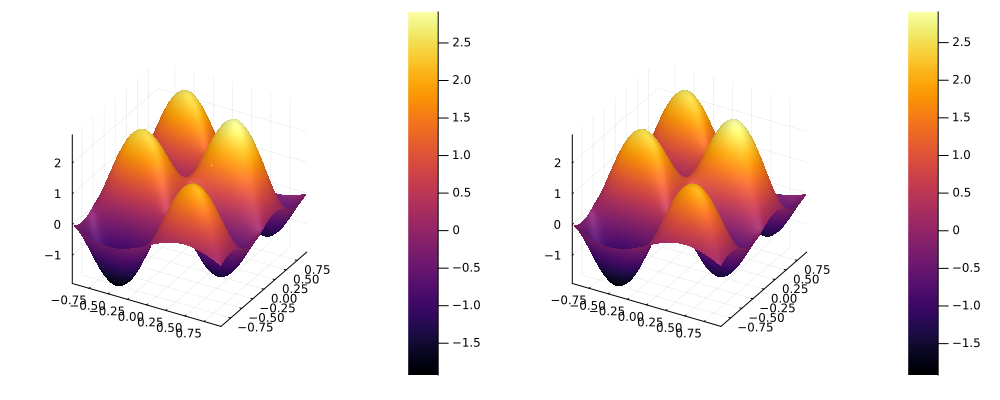

In [8]:
M = 64
P = M
domain = RectangularDomain(-1, 1, -1, 1)
alpha = 3.0

plot_case(M, P, alpha, test_f_1, domain, test_u_1)

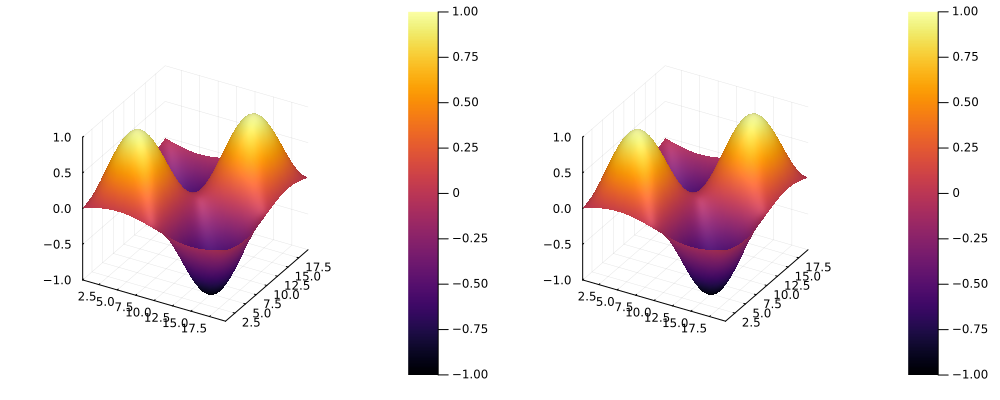

In [9]:
M = 64
P = M
domain = RectangularDomain(0, 20, 0, 20)
alpha = 0.0

plot_case(M, P, alpha, test_f_2, domain, test_u_2)

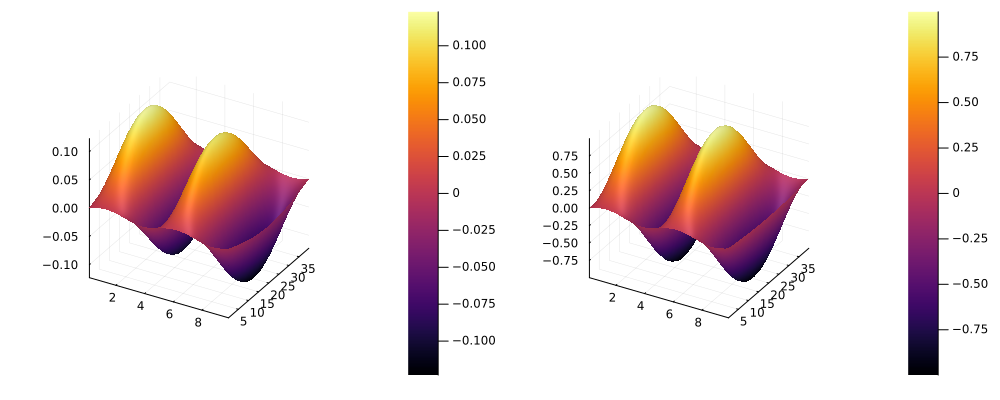

In [11]:
M = 64
P = M
domain = RectangularDomain(0, 10, 0, 40)
alpha = 0.0

plot_case(M, P, alpha, test_f_2, domain, test_u_2)